In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('vehicles.csv')
df.head()

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  

[5 rows x 26 columns]

In [3]:
# data cleansing
# View data info and shape
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

(426880, 26)

In [4]:
# remove duplicates
#check if there are any 'True' boolean statements in the duplicate function
df.duplicated().value_counts()

False    426880
Name: count, dtype: int64

There are no duplicate entries in the data. This could also be missleading as the id column could have different numbers but other details are identical. Let's have a look.

First, keep the coulmns needed for analysis. Delete columns:

region_url and image_url -- website links to posting, region, and car image resp.. Not important. Although, image_url will be used to get the image of hte car for recommendation purposes
description -- not important in this analysis. No word count analysis involved in this project
VIN not important
county -- dummy column left in dataset
poisitng_date, lat, long
Also remove the id column to check for duplicates

In [5]:
#Select required columns
output = df[['region', 'price', 'year', 'manufacturer', 'model', 
             'fuel', 'odometer', 'title_status', 'transmission', 
             'condition', 'cylinders', 'drive', 'size', 'type', 
             'paint_color', 'state','image_url', 'lat', 'long', 'posting_date']]
output.to_csv('vehicles2.csv',index=False)

In [6]:
# load vehicle2 file for further processing
df = pd.read_csv('vehicles2.csv')
df.head()

region  price  year manufacturer model fuel  odometer  \
0                prescott   6000   NaN          NaN   NaN  NaN       NaN   
1            fayetteville  11900   NaN          NaN   NaN  NaN       NaN   
2            florida keys  21000   NaN          NaN   NaN  NaN       NaN   
3  worcester / central MA   1500   NaN          NaN   NaN  NaN       NaN   
4              greensboro   4900   NaN          NaN   NaN  NaN       NaN   

  title_status transmission condition cylinders drive size type paint_color  \
0          NaN          NaN       NaN       NaN   NaN  NaN  NaN         NaN   
1          NaN          NaN       NaN       NaN   NaN  NaN  NaN         NaN   
2          NaN          NaN       NaN       NaN   NaN  NaN  NaN         NaN   
3          NaN          NaN       NaN       NaN   NaN  NaN  NaN         NaN   
4          NaN          NaN       NaN       NaN   NaN  NaN  NaN         NaN   

  state image_url  lat  long posting_date  
0    az       NaN  NaN   NaN          NaN  
1    ar       NaN  NaN   NaN          NaN  
2    fl       NaN  NaN   NaN          NaN  
3    ma       NaN  NaN   NaN          NaN  
4    nc       NaN  NaN   NaN          NaN

In [7]:
# find duplicates
df.duplicated().value_counts()

False    426845
True         35
Name: count, dtype: int64

In [8]:
# There seem to be 35 duplicate rows to be removed.
df.drop_duplicates(inplace=True)
df.shape

(426845, 20)

Select variables and remove missing values
Let's examine the posting dates against the geographical positions to filter hotspots.

In [9]:
#view posting date format
df.posting_date

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                    ...           
426875    2021-04-04T03:21:31-0600
426876    2021-04-04T03:21:29-0600
426877    2021-04-04T03:21:17-0600
426878    2021-04-04T03:21:11-0600
426879    2021-04-04T03:21:07-0600
Name: posting_date, Length: 426845, dtype: object

In [10]:
# change posting date to datetime format and get the day and month
df=df.dropna(subset=['posting_date'],axis=0)
df['postmd'] = pd.to_datetime(df['posting_date'],utc=True).apply(lambda x: x.strftime('%B-%d')
                                                            if not pd.isnull(x) else '')
df['postmd']

27          May-04
28          May-04
29          May-04
30          May-04
31          May-03
            ...   
426875    April-04
426876    April-04
426877    April-04
426878    April-04
426879    April-04
Name: postmd, Length: 426788, dtype: object

In [11]:
df.sort_values(by='postmd')
df.shape

(426788, 21)

In [12]:
# examine and remove missing data
#Let's visualize the missing data
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
#first plot, bar plot of missing values
ax1.bar(df.columns,df.isna().sum())
ax1.set_ylabel('Missing values')
ax1.set_ylim(0,df.shape[0])
ax1.tick_params('x',labelrotation=90)
#second plot, heatmap of missing values
sns.heatmap(df.isna(),yticklabels=False,cbar=False, cmap='Blues',ax=ax2)
plt.show()

Visualizing the missing data, we see that there are quite a number of columns with a lot of missing data. Namely: **size**, **condition**, **cylinders**, **drive**, **paint_color**, and **type**.
Since more than 50% of values in the **size** columns is missing, it will be removed.

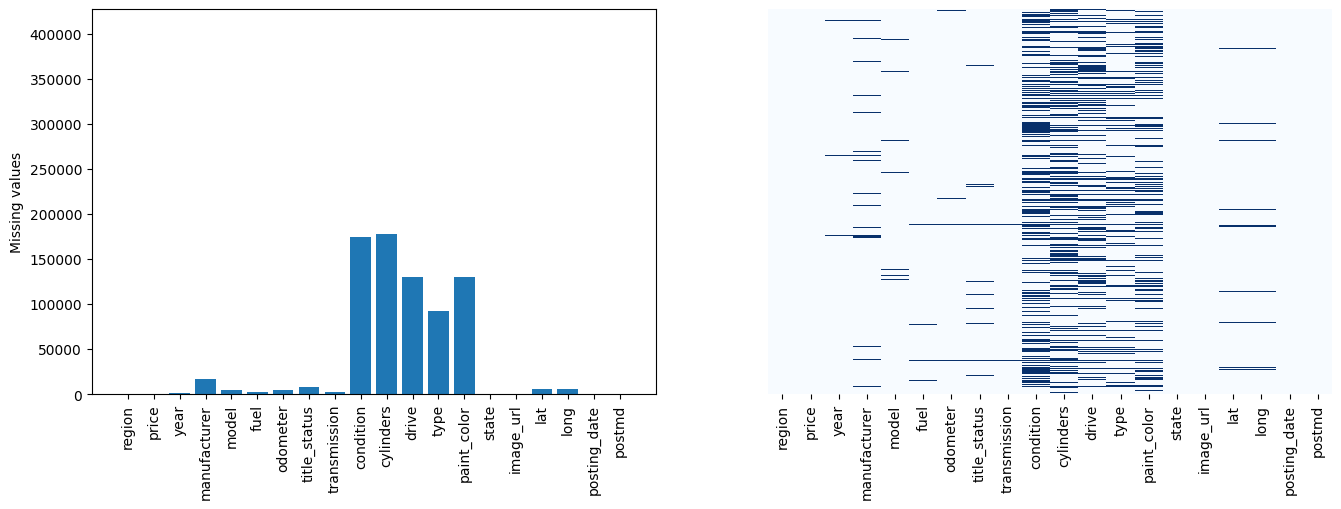

In [13]:
#Remove size column and replot
df.drop(['size'],axis=1,inplace=True)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
#first plot, bar plot of missing values
ax1.bar(df.columns,df.isna().sum())
ax1.set_ylabel('Missing values')
ax1.set_ylim(0,df.shape[0])
ax1.tick_params('x',labelrotation=90)
#second plot, heatmap of missing values
sns.heatmap(df.isna(),yticklabels=False,cbar=False, cmap='Blues',ax=ax2)
plt.show()

_Missing values removal 1_: Remove rows with missing values present in **year, model, fuel, odometer** and **transmission** as these are important information that cannot be easily obtained. 

_Missing values removal 2_: Then, remove rows with concurrent missing values present in all of the remaining columns **(manufacturer, condition, cylinders, title_status, drive, type, paint_color, lat and long)** with missing values

_Missing values removal 3_: Keep rows with at least 7 non-NA values.

In [14]:
#drop missing rows in year, model, fuel, odometer, transmission
df.dropna(subset=['year','model','fuel','odometer','transmission'],axis=0,inplace=True)
df.shape

(412348, 20)

In [15]:
#drop all concurrent missing values in manufacturer, condition, cylinders, title status, drive, type, paint color, lat and long 
df.dropna(subset=['manufacturer', 'condition', 'cylinders', 'title_status', 
                    'drive', 'type', 'paint_color', 'lat', 'long'], axis=0, how='all', inplace=True)
df.shape

(412348, 20)

It seems there are no rows with concurrent missing values in those columns.

In [16]:
#keep rows with at least 7 non-NA values
df.dropna(subset=['manufacturer', 'condition', 'cylinders', 'title_status', 
                    'drive', 'type', 'paint_color', 'lat', 'long'], axis=0, thresh=7, inplace=True)
df.shape

(302565, 20)

With this dataset, a maximum of 2 missing values are concurently present in a row.

remove outliers
Search for outliers in the columns with numerical values, namely: **price** and **odometer**

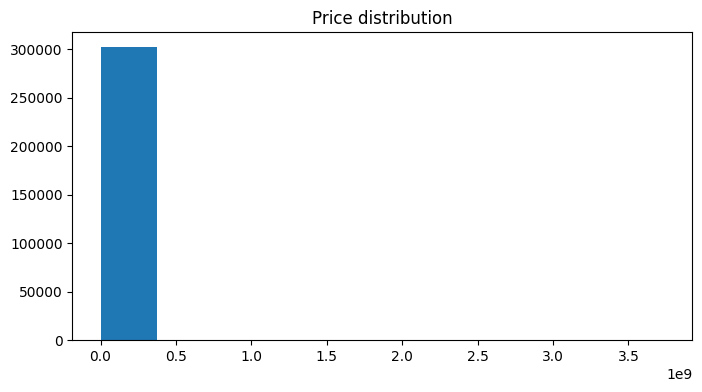

In [18]:
#check the price column for outliers
fig,ax=plt.subplots(figsize=(8,4))
df.price.hist()
plt.title('Price distribution')
plt.grid(False)

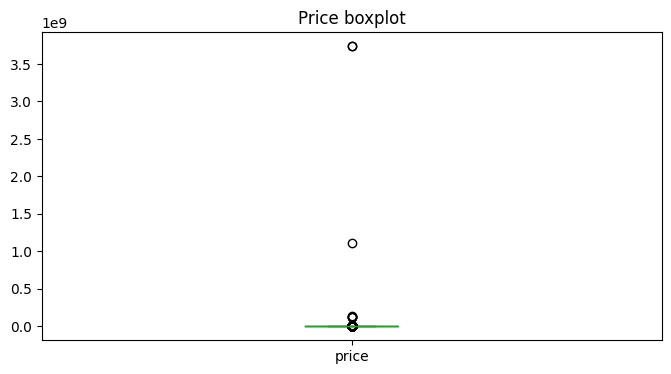

In [19]:
#use boxplots to find outliers
fig,ax=plt.subplots(figsize=(8,4))
df.price.plot(kind='box')
plt.title('Price boxplot')
plt.grid(False)

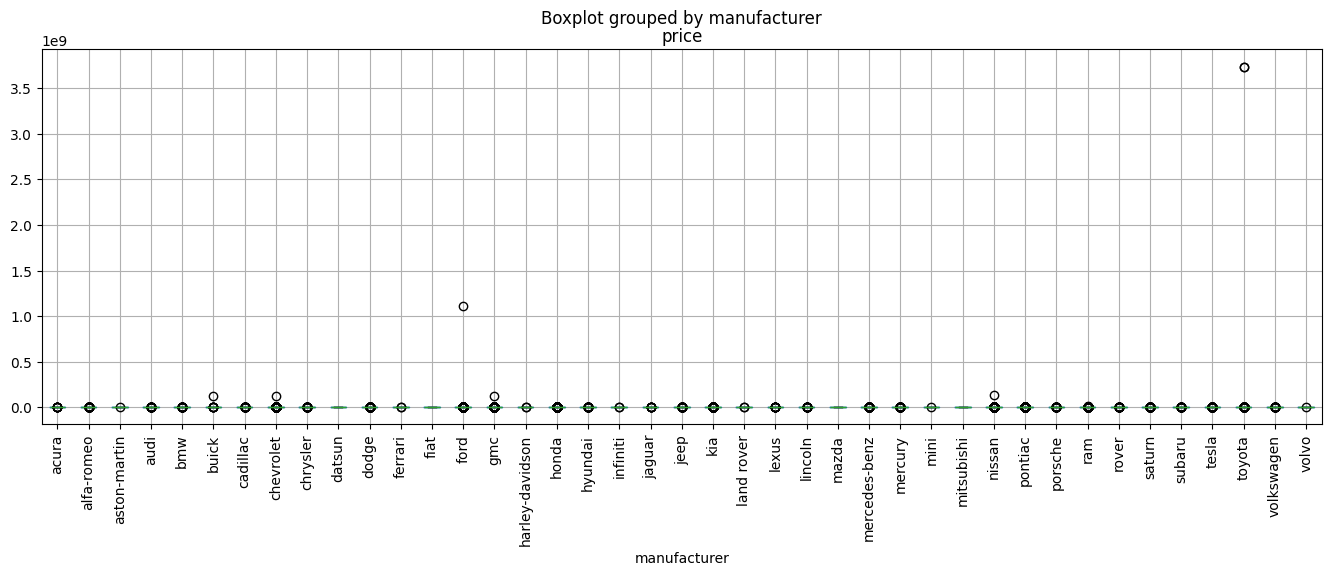

In [20]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','manufacturer',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

#high price strangely related to ford and toyota. Might be erorr in data enrty or scraping because these manufacturers are 
#not known for high end luxury or sporting cars

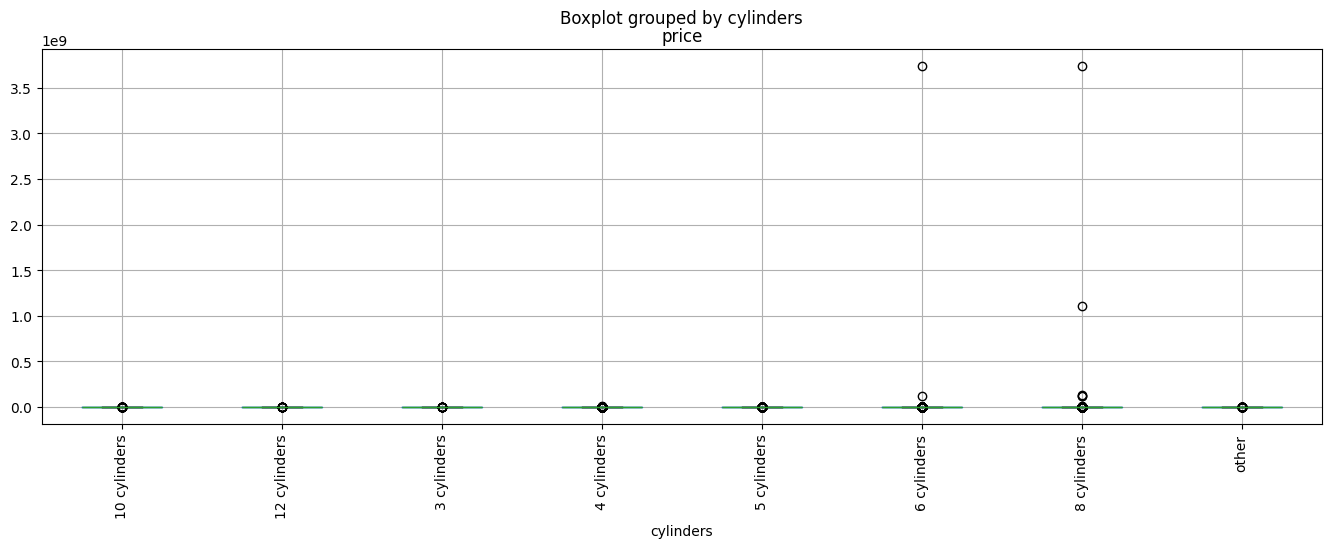

In [21]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','cylinders',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()
#high price related to 6 and 8 cylinder cars which indicate large pickups or sporting cars

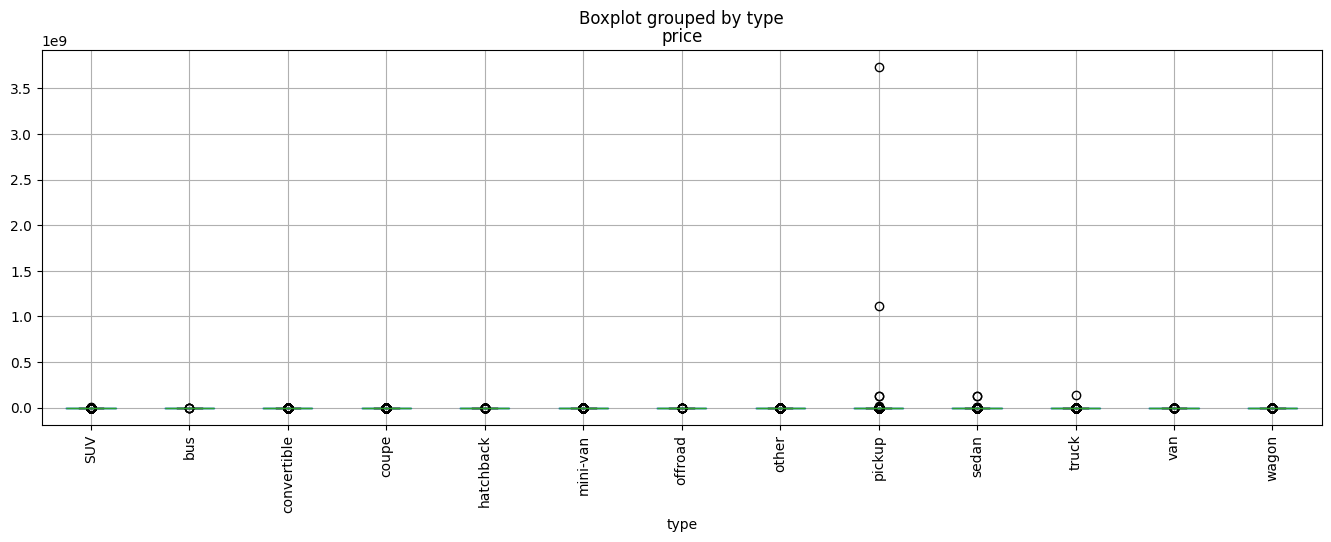

In [22]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','type',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()
#high price strangely related to pickup trucks

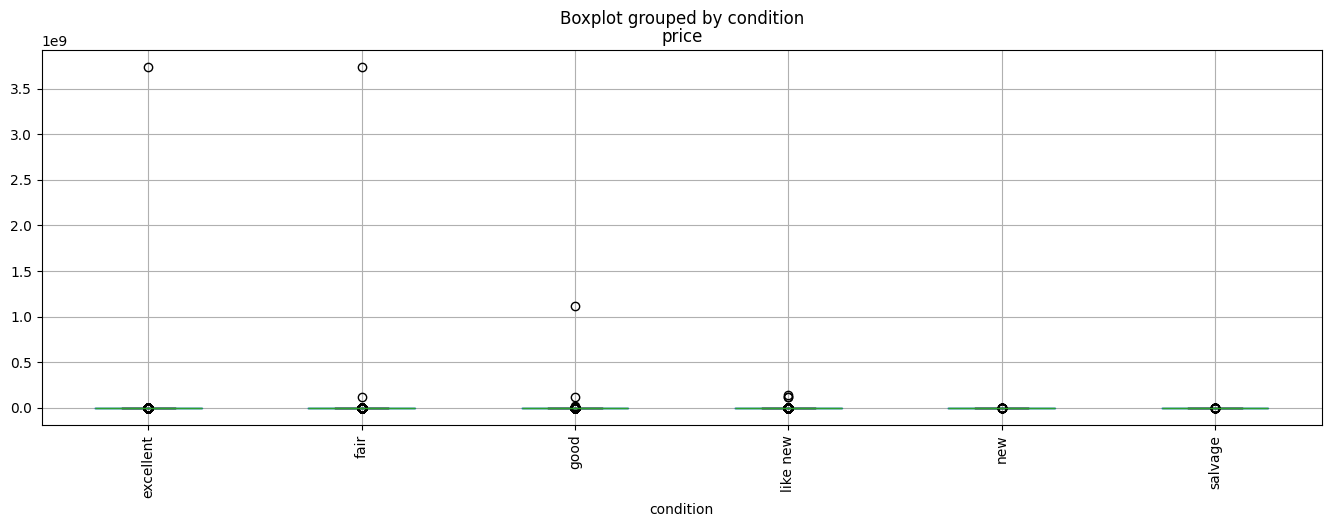

In [23]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','condition',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()
# high price not related to new cars

In [24]:
#view the high priced car outliers
#for prices upwards of 100,000,000, ford, toyota, chevrolet, nissan and buick are present.
outlier=df.loc[((df.price > 500_000) & (df.price < 100_000_000))]
outlier

region     price    year   manufacturer  \
68935            ventura county   2000000  2002.0         saturn   
95119     ft myers / SW florida    990000  2017.0  mercedes-benz   
105843                  orlando   6995495  2014.0          dodge   
106361                  orlando    516999  2016.0            NaN   
136516  spokane / coeur d'alene  17000000  2007.0            ram   
155421              terre haute   1234567  2006.0           jeep   
194292                ann arbor   1234567  2010.0        lincoln   
208617  saginaw-midland-baycity    554900  2019.0            NaN   
219241             southwest MS   1111111  1970.0          dodge   
327938        altoona-johnstown   3226714  2002.0            NaN   

                              model    fuel  odometer title_status  \
68935       l-series l200 4dr sedan     gas  164290.0        clean   
95119                      amg g 63     gas    4085.0        clean   
105843                      journey     gas  135888.0        clean   
106361  Lambo Aventador SV Roadster     gas    9982.0        clean   
136516                         2500  diesel  170000.0      rebuilt   
155421                     wrangler     gas  123456.0        clean   
194292                 mkt ecoboost     gas   85653.0        clean   
208617             f250 xlt crewcab     gas   25365.0         lien   
219241                   challenger     gas   42000.0        clean   
327938                  any and all  diesel    1234.0        clean   

       transmission  condition     cylinders drive         type paint_color  \
68935     automatic       good   4 cylinders   fwd        sedan       green   
95119     automatic        NaN   8 cylinders   4wd          SUV       white   
105843    automatic        NaN   4 cylinders   fwd          SUV         NaN   
106361    automatic   like new  12 cylinders   4wd  convertible       white   
136516    automatic       good   8 cylinders   4wd       pickup       black   
155421    automatic   like new   6 cylinders   4wd          SUV      custom   
194292    automatic   like new           NaN   NaN          SUV      custom   
208617    automatic  excellent   8 cylinders   4wd       pickup       white   
219241    automatic       fair   8 cylinders   rwd        coupe        blue   
327938       manual       fair   8 cylinders   4wd        sedan        blue   

       state                                          image_url        lat  \
68935     ca  https://images.craigslist.org/00y0y_hw8QSdnerF...  34.236498   
95119     fl  https://images.craigslist.org/00P0P_4xcfVqDGil...  26.157900   
105843    fl  https://images.craigslist.org/01010_d7c56qbQLs...  28.394900   
106361    fl  https://images.craigslist.org/00n0n_eGPWhFc9Nn...  28.463700   
136516    id  https://images.craigslist.org/01414_gkRWFvHd8y...  47.642227   
155421    in  https://images.craigslist.org/00j0j_1NcNYUY3ww...  38.025845   
194292    mi  https://images.craigslist.org/00000_jJCci6NDXh...  41.381500   
208617    mi  https://images.craigslist.org/00U0U_gbHHsMui1m...  43.637500   
219241    ms  https://images.craigslist.org/00303_jfKeiE5HbH...  47.509800   
327938    pa  https://images.craigslist.org/00B0B_heEI8cTCHX...  40.480100   

              long              posting_date    postmd  
68935  -119.039074  2021-04-06T16:40:31-0700  April-06  
95119   -81.766548  2021-04-24T13:12:08-0400  April-24  
105843  -81.417900  2021-04-28T20:11:41-0400  April-29  
106361  -81.394800  2021-04-26T17:40:47-0400  April-26  
136516 -117.348404  2021-05-02T19:27:17-0700    May-03  
155421  -87.596457  2021-04-18T11:26:55-0400  April-18  
194292  -83.650700  2021-04-16T15:15:44-0400  April-16  
208617  -84.197900  2021-05-02T18:30:41-0400    May-02  
219241 -111.273400  2021-04-11T19:04:00-0500  April-12  
327938  -78.726300  2021-04-29T18:24:17-0400  April-29

There seem to be errors in the price values. It seems random and intentionally set to various price extremes.

There also seem to be an issue with some of the pricing for the cars. For example, the 2002 saturn Lseries has an average resale value of 5,000 USD but here it shows 2,000,000 USD. Either there is entry error or error from data scraping.

Also, some of the odometer readins seem unreasonable. For example, the odometer reading for a 2017 mercedez benz amg G63 (item 95119) is only 4,085 km. So it would be wise to use a reasonable start and limit for the odometer reading for this analysis

In [25]:
#more tests on the price column
test=df.loc[((data.manufacturer == "tesla"))]
test.head()

NameError: name 'data' is not defined

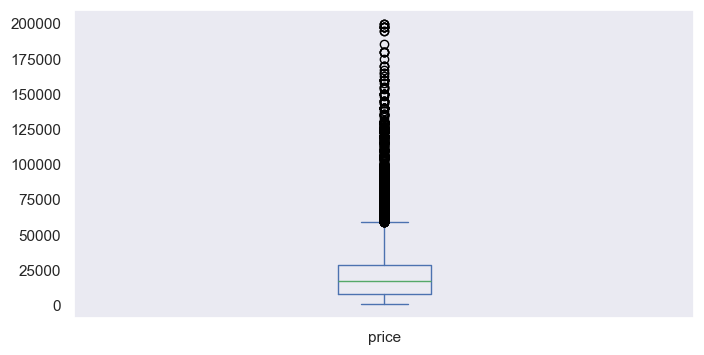

In [26]:
#filter data for price between 1k and 150k
df2 = df.loc[(df.price >= 1_000) & (df.price <= 200_000)]
sns.set()
fig,(ax1)=plt.subplots(figsize=(8,4))
df2.price.plot(kind='box')
ax2.set_title('1,000 - 200,000 price range')
plt.grid(False)

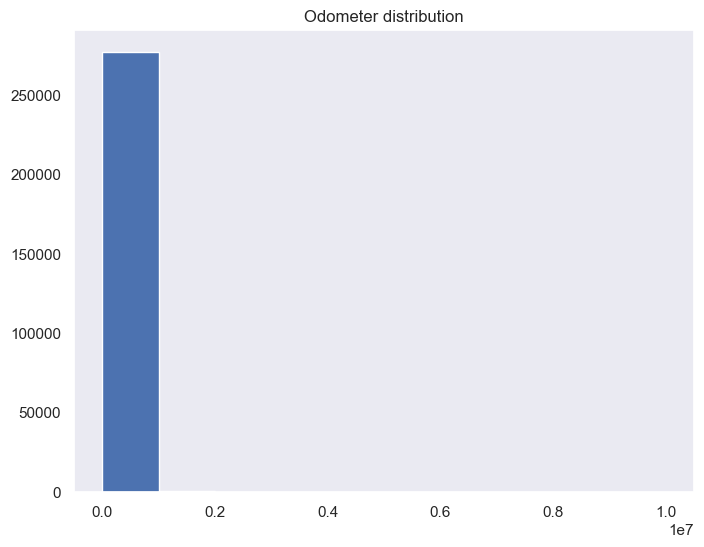

In [27]:
#check the odometer column for outliers
fig,ax=plt.subplots(figsize=(8,6))
df2.odometer.hist()
plt.title('Odometer distribution')
plt.grid(False)

In [28]:
#use boxplots to find outliers
fig,ax=plt.subplots(figsize=(8,6))
df2.odometer.plot(kind='box')
plt.title('Odometer boxplot')
plt.grid(False)

There seem to be a lot of outliers and abnormalities in the odometer readings. To address this, we consider that the average mileage per year in the US is 14,000 miles (22,500 km). And assuming the minimum age of a car is 2, In the spirit of the analysis purpose, we assume the minimum age of a listed car is 2 yrs, so we shall filter the odometer readings between **45,000 km** and **500,000 km** (28,000 to 300,000 miles) driven.

In [29]:
#filter data for odometer between 0 miles and 500,000 km
df3 = df2.loc[(df2.odometer >= 45_000) & (df2.odometer <= 500_000)]
fig,(ax)=plt.subplots(figsize=(8,6))
df3.odometer.plot(kind='box')
ax.set_title('0 - 500,000 km odometer range')
plt.grid(None)

In [30]:
df3.shape

(191279, 20)

In [32]:
#save new dataset and load
df3.to_csv('vehicles2_cleaned.csv',index=False)
import pandas as pd
data = pd.read_csv('vehicles2_cleaned.csv')
data.head()

region  price    year manufacturer                        model fuel  \
0  auburn  33590  2014.0          gmc     sierra 1500 crew cab slt  gas   
1  auburn  22590  2010.0    chevrolet               silverado 1500  gas   
2  auburn  15000  2013.0         ford                    f-150 xlt  gas   
3  auburn  27990  2012.0          gmc  sierra 2500 hd extended cab  gas   
4  auburn   4500  1992.0         jeep                     cherokee  gas   

   odometer title_status transmission  condition    cylinders drive    type  \
0   57923.0        clean        other       good  8 cylinders   NaN  pickup   
1   71229.0        clean        other       good  8 cylinders   NaN  pickup   
2  128000.0        clean    automatic  excellent  6 cylinders   rwd   truck   
3   68696.0        clean        other       good  8 cylinders   4wd  pickup   
4  192000.0        clean    automatic  excellent  6 cylinders   4wd     NaN   

  paint_color state                                          image_url  \
0       white    al  https://images.craigslist.org/00R0R_lwWjXSEWNa...   
1        blue    al  https://images.craigslist.org/00R0R_lwWjXSEWNa...   
2       black    al  https://images.craigslist.org/00404_l4loxHvdQe...   
3       black    al  https://images.craigslist.org/00V0V_ftJbKrOgdi...   
4         NaN    al  https://images.craigslist.org/01010_7EM2aot64G...   

       lat     long              posting_date  postmd  
0  32.5900 -85.4800  2021-05-04T12:31:18-0500  May-04  
1  32.5900 -85.4800  2021-05-04T12:31:08-0500  May-04  
2  32.5920 -85.5189  2021-05-03T14:02:03-0500  May-03  
3  32.5900 -85.4800  2021-05-03T13:41:25-0500  May-03  
4  32.6454 -85.3783  2021-05-03T07:38:05-0500  May-03

In [33]:
data.isna().sum()

region              0
price               0
year                0
manufacturer     5542
model               0
fuel                0
odometer            0
title_status     1494
transmission        0
condition       47036
cylinders       34423
drive           19828
type            16106
paint_color     23973
state               0
image_url           0
lat               435
long              435
posting_date        0
postmd              0
dtype: int64

### EXPLORATORY DATA ANALYSIS
We take a look at some of the variables and their distribution.
##### The posting date column

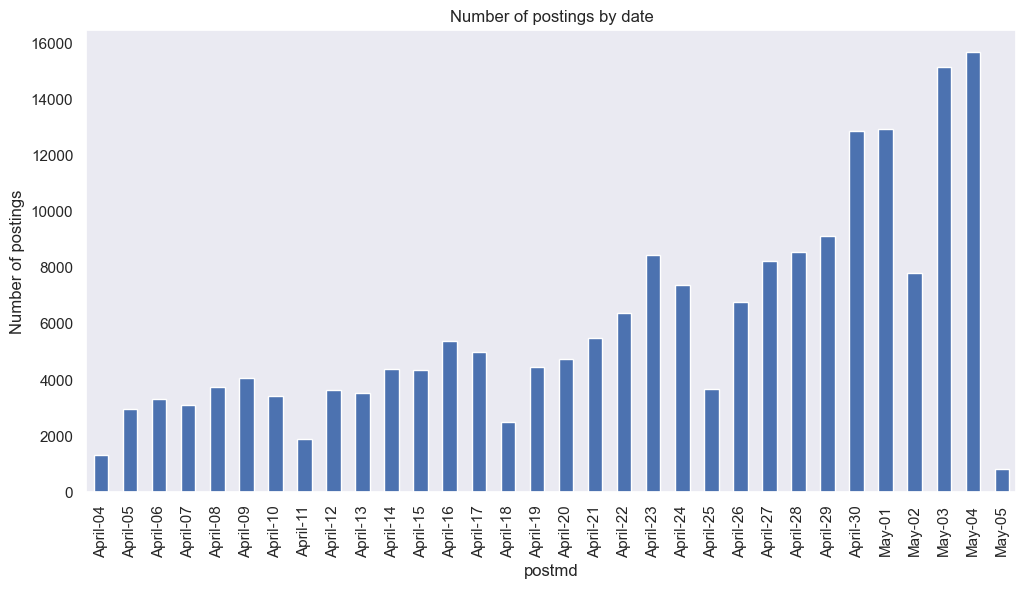

In [34]:
# Check number of listings for each day of data entry
fig,ax=plt.subplots(figsize=(12,6))
sns.set()
data.postmd.value_counts().sort_index().plot(kind='bar')
plt.ylabel('Number of postings')
plt.title('Number of postings by date')
plt.grid(None)

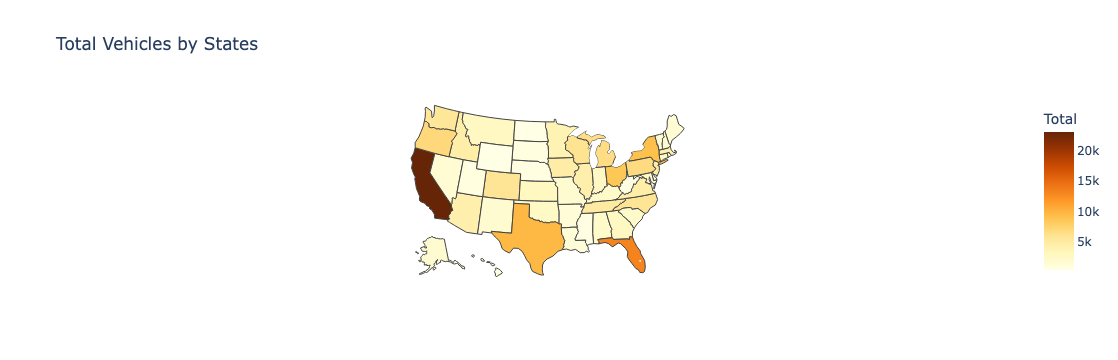

In [35]:
#code for presenting the geographical distribution of the used car listings
import plotly.graph_objects as go
import plotly.express as px

mapcount = data.groupby('state', dropna=False)['state'].count().reset_index(name="count")
fig = go.Figure(data = go.Choropleth(
    locations=mapcount['state'].str.upper(),
    z=mapcount['count'],
    locationmode='USA-states',
    colorscale='YlOrBr',
    colorbar_title="Total",
    hovertext=data['state'],
), layout=dict(title = 'Total Vehicles by States'))

fig.update_layout(
    geo_scope = 'usa'
)

fig.show()

In [36]:
# get the states with <5000 used car postings
data['state'].apply(lambda x: x.upper()).value_counts()>=5000
#data.state.value_counts().index

state
CA     True
FL     True
TX     True
NY     True
OH     True
OR     True
PA     True
MI     True
WI     True
CO     True
NC     True
WA     True
TN    False
NJ    False
IA    False
ID    False
VA    False
IL    False
AZ    False
MA    False
MN    False
KS    False
MT    False
GA    False
IN    False
CT    False
OK    False
KY    False
AL    False
SC    False
MD    False
NM    False
AK    False
MO    False
NH    False
NV    False
VT    False
ME    False
DC    False
RI    False
AR    False
LA    False
HI    False
SD    False
UT    False
NE    False
MS    False
DE    False
WV    False
ND    False
WY    False
Name: count, dtype: bool

In [37]:
# Filter out the states with <5000 used car postings
datav2 = data.loc[~(data.state.isin(['tn', 'nj', 'ia', 'id', 'va', 'il', 'az', 'ma', 'mn', 'ks', 'mt', 'ga',
       'in', 'ct', 'ok', 'ky', 'al', 'sc', 'md', 'nm', 'ak', 'mo', 'nh', 'nv',
       'vt', 'me', 'dc', 'ri', 'ar', 'la', 'hi', 'sd', 'ut', 'ne', 'ms', 'de',
       'wv', 'nd', 'wy']))]
datav2.shape

(106753, 20)

In [38]:
#check the distribution of manufacturers 
fig,ax=plt.subplots(figsize=(16,6))
sns.set_context('paper',font_scale=2)
datav2.manufacturer.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count of manufacturers')
plt.title('Distribution of manufacturers')
plt.grid(False)
#y=[2500,2500]
#x=[-1,100]
#_=plt.plot(x,y,color='k',label='5,000 postings cut-off',linewidth=3)
#_=plt.legend()

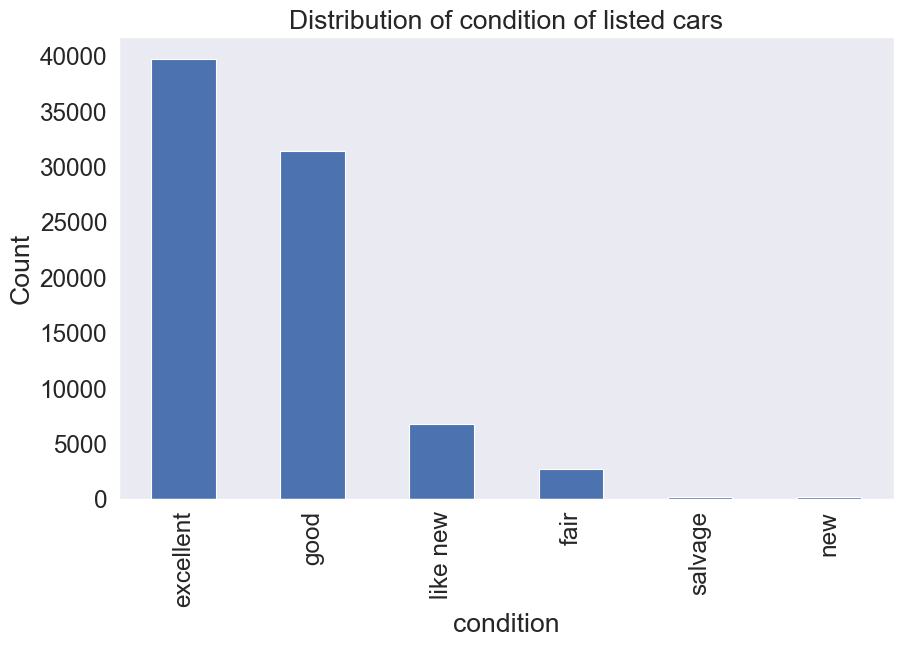

In [39]:
#check the condition of the listed used cars 
fig,ax=plt.subplots(figsize=(10,6))
datav2.condition.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Distribution of condition of listed cars')
plt.grid(None)

In [40]:
#check the number of cylinders of the listed used cars 
fig,ax=plt.subplots(figsize=(10,6))
datav2.cylinders.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Number of cylinders of cars')
plt.grid(None)

In [41]:
#check the fuel type used for listed used cars 
fig,ax=plt.subplots(figsize=(10,6))
datav2.fuel.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Type of fuel')
plt.grid(None)

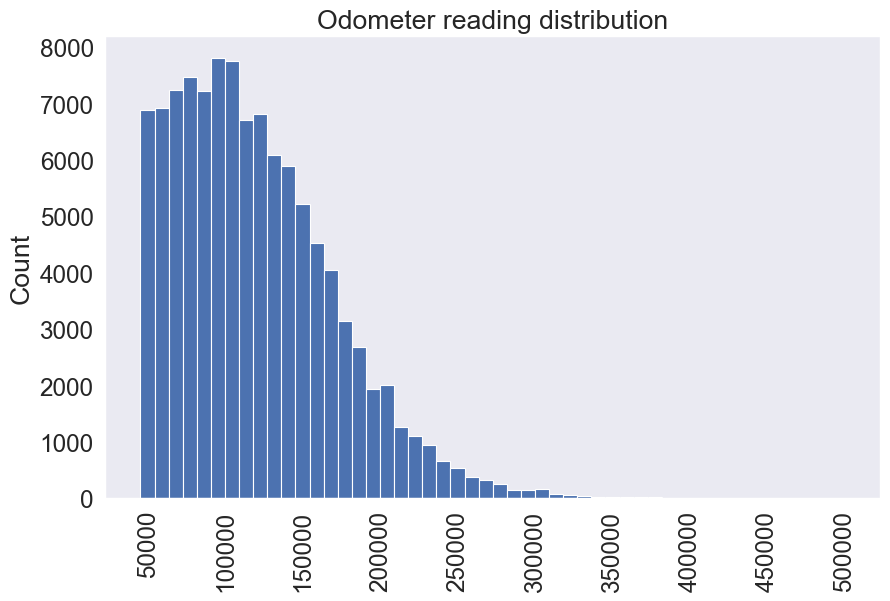

In [42]:
#check the odometer range for the listed cars 
fig,ax=plt.subplots(figsize=(10,6))
datav2.odometer.hist(bins=50)
plt.ylabel('Count')
plt.xticks(rotation=90)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(10000))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50000))

plt.title('Odometer reading distribution')
plt.grid(None)

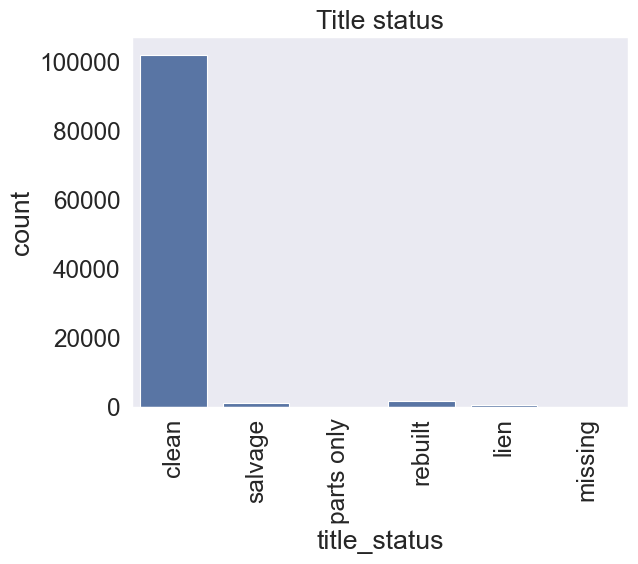

In [43]:
#check the title stutus column
sns.countplot(x='title_status',data=datav2)
plt.title('Title status')
plt.xticks(rotation=90)
plt.grid([])

In [44]:
#check the transmission column
sns.countplot(x='transmission',data=datav2)
plt.title('Transmission')
plt.grid([])

In [45]:
#check the drive column
sns.countplot(x='drive',data=datav2)
plt.title('Type of drive mechanics')
plt.tick_params(labelsize=12)
plt.grid([])

In [46]:
#check drive type and car type distribution
plt.figure(figsize=(16,6))
sns.countplot(x='drive',data=datav2,hue='type',palette='Accent')
sns.set_context('paper',font_scale=0)
plt.title('Drive type and car type distribution')
plt.grid([])



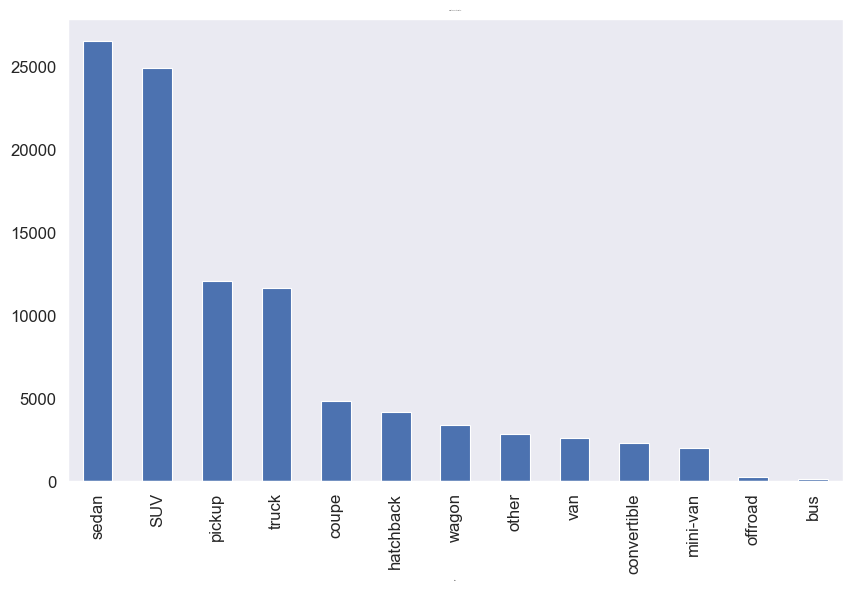

In [47]:
#check the car type distribution
plt.figure(figsize=(10,6))
datav2.type.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Car type distribution')
plt.tick_params(labelsize=12)
plt.grid([])

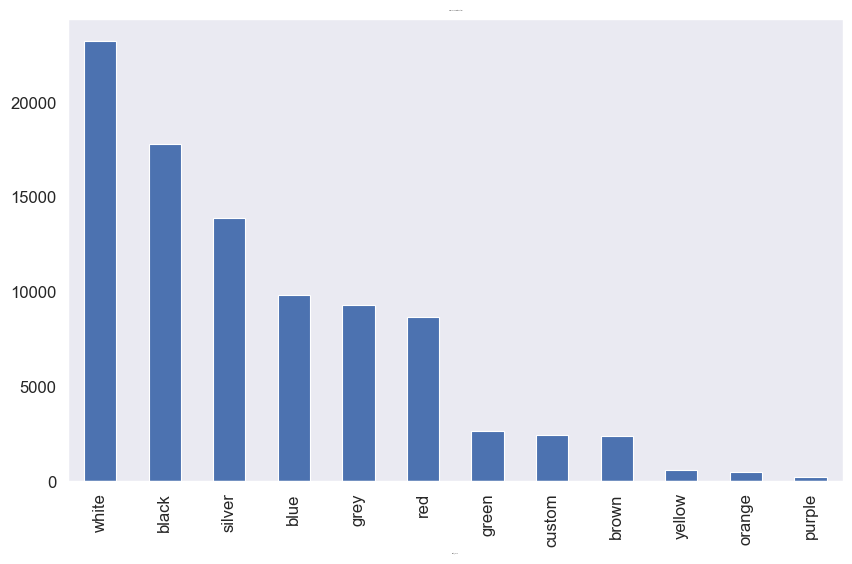

In [48]:
#check the car color distribution
plt.figure(figsize=(10,6))
datav2.paint_color.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Car colors distribution')
plt.tick_params(labelsize=12)
plt.grid([])

In [49]:
#save data to new file
datav2.to_csv('vehicles2_EDA.csv', index=False)
data = pd.read_csv('vehicles2_EDA.csv')

In [50]:
data.head()

region  price    year     manufacturer                    model  \
0  bakersfield  11975  2003.0  harley-davidson                 davidson   
1  bakersfield  21950  2003.0        chevrolet           silverado 3500   
2  bakersfield  15590  2015.0             mini  hardtop 2 door cooper s   
3  bakersfield   3975  2006.0          pontiac                       g6   
4  bakersfield   8000  1972.0        chevrolet                 chevelle   

     fuel  odometer title_status transmission  condition    cylinders drive  \
0     gas  207000.0        clean    automatic  excellent  8 cylinders   rwd   
1  diesel  202537.0        clean    automatic  excellent  8 cylinders   4wd   
2   other   60291.0        clean        other       good          NaN   NaN   
3     gas  187000.0        clean    automatic  excellent  4 cylinders   fwd   
4     gas   61000.0        clean    automatic       fair  8 cylinders   rwd   

        type paint_color state  \
0     pickup       black    ca   
1      truck        grey    ca   
2  hatchback         red    ca   
3      sedan      silver    ca   
4        NaN       white    ca   

                                           image_url        lat        long  \
0  https://images.craigslist.org/00F0F_eEBhgvA15M...  34.070612 -117.383384   
1  https://images.craigslist.org/00m0m_9owDGrPLWK...  33.794656 -117.992994   
2  https://images.craigslist.org/00f0f_dGlIKGTKrJ...  35.380000 -119.020000   
3  https://images.craigslist.org/00V0V_5uw5gVZjSk...  34.070612 -117.383384   
4  https://images.craigslist.org/00U0U_gvATaIvxTn...  35.248476 -118.936316   

               posting_date  postmd  
0  2021-05-04T12:26:43-0700  May-04  
1  2021-05-04T12:04:51-0700  May-04  
2  2021-05-04T11:41:15-0700  May-04  
3  2021-05-04T11:35:04-0700  May-04  
4  2021-05-04T11:30:14-0700  May-04

In [51]:
#convert the year column from 'float64' to year type as 'int64'
data['year']=pd.to_datetime(data['year'],errors='ignore',format='%y')

/var/folders/rn/d36sq_s56lgfw2lr5q027rp40000gp/T/ipykernel_49418/2448207586.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




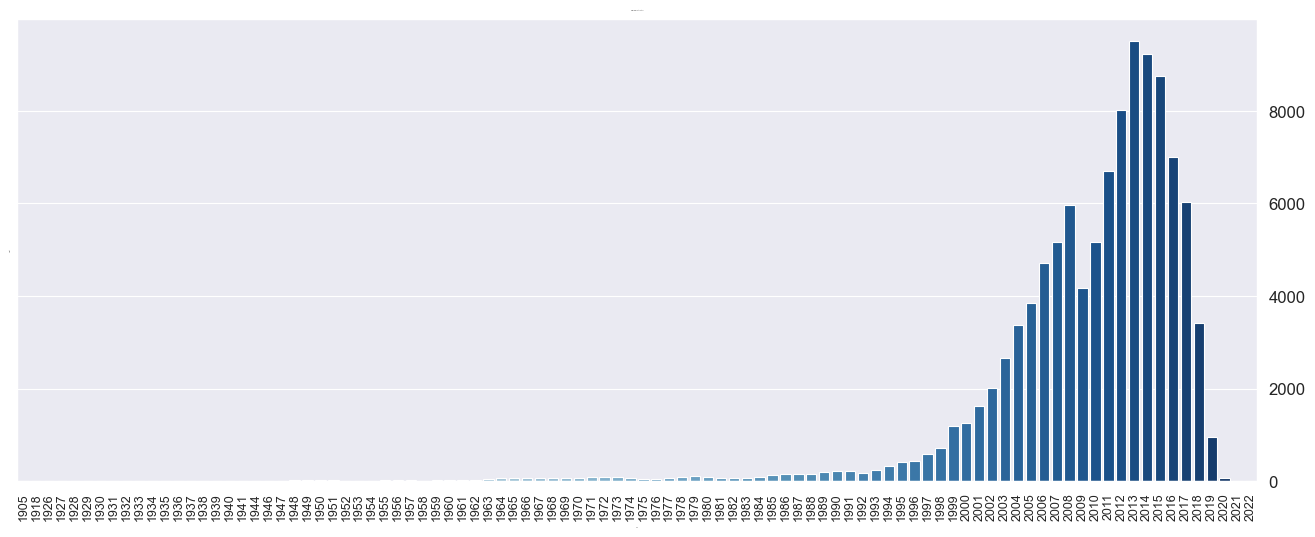

In [52]:
#check the car year distribution
plt.figure(figsize=(16,6))
sns.countplot(x='year',data=data,palette='Blues',dodge=False)
plt.title('Car year distribution')
plt.tick_params(labelsize=12)
plt.xticks(fontsize=9,rotation=90)
plt.tick_params(axis='y', labelleft=False, labelright=True)
plt.show()

In [53]:
#create Age column
data['Age'] = 2024 - (data['year']-1)
#plot Age distribution
plt.figure(figsize=(16,6))
sns.set()
sns.countplot(x='Age',data=data,palette='Blues_r')
plt.xticks(fontsize=9,rotation=90)
plt.show()

/var/folders/rn/d36sq_s56lgfw2lr5q027rp40000gp/T/ipykernel_49418/2556676756.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




In [57]:
#take out the 0-1 year old cars
data = data.loc[~(data.Age < 2)]

In [58]:
#create average mileage per year column
data['avg_mil'] = data['odometer'] / data['Age']
data['avg_mil']

0         9409.090909
1         9206.227273
2              6029.1
3         9842.105263
4         1150.943396
             ...     
106748    6974.846154
106749         6137.5
106750    2585.714286
106751         9014.0
106752         8449.8
Name: avg_mil, Length: 106753, dtype: object

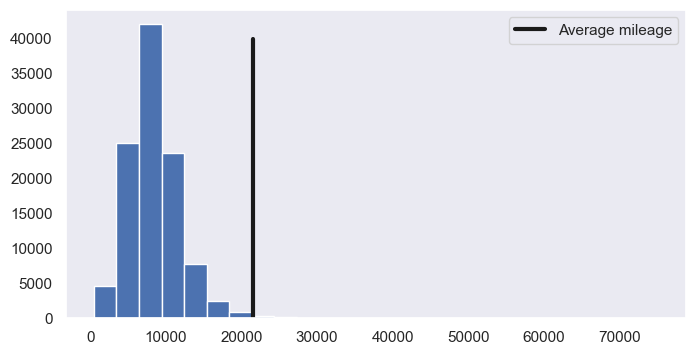

In [59]:
#create a plot of the average mileages
plt.figure(figsize=(8,4))
data.avg_mil.hist(bins=25)
y=[0,40000]
x=[21500,21500]
_=plt.plot(x,y,color='k',label='Average mileage',linewidth=3)
_=plt.legend()
plt.grid(None)

Create a column to classify whether each car's average mileage per year is below or above the average of **13,500 miles** (21,500 km) in the US

In [60]:
#create milage rating column
data['mil_rating'] = "below average"
data.loc[data['avg_mil'] > 21500, 'mil_rating'] = "above average"

In [61]:
#plot the chart of mileage rating
ax = sns.countplot(x='mil_rating',data=data)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.01))
plt.grid()
plt.show()

In [62]:
#save data to new file
data.to_csv('vehicles2_cleaned_v2.csv',index=False)
data = pd.read_csv('vehicles2_cleaned_v2.csv')

In [63]:
data.head()

region  price  year     manufacturer                    model    fuel  \
0  bakersfield  11975  2003  harley-davidson                 davidson     gas   
1  bakersfield  21950  2003        chevrolet           silverado 3500  diesel   
2  bakersfield  15590  2015             mini  hardtop 2 door cooper s   other   
3  bakersfield   3975  2006          pontiac                       g6     gas   
4  bakersfield   8000  1972        chevrolet                 chevelle     gas   

   odometer title_status transmission  condition  ... paint_color state  \
0  207000.0        clean    automatic  excellent  ...       black    ca   
1  202537.0        clean    automatic  excellent  ...        grey    ca   
2   60291.0        clean        other       good  ...         red    ca   
3  187000.0        clean    automatic  excellent  ...      silver    ca   
4   61000.0        clean    automatic       fair  ...       white    ca   

                                           image_url        lat        long  \
0  https://images.craigslist.org/00F0F_eEBhgvA15M...  34.070612 -117.383384   
1  https://images.craigslist.org/00m0m_9owDGrPLWK...  33.794656 -117.992994   
2  https://images.craigslist.org/00f0f_dGlIKGTKrJ...  35.380000 -119.020000   
3  https://images.craigslist.org/00V0V_5uw5gVZjSk...  34.070612 -117.383384   
4  https://images.craigslist.org/00U0U_gvATaIvxTn...  35.248476 -118.936316   

               posting_date  postmd  Age      avg_mil     mil_rating  
0  2021-05-04T12:26:43-0700  May-04   22  9409.090909  below average  
1  2021-05-04T12:04:51-0700  May-04   22  9206.227273  below average  
2  2021-05-04T11:41:15-0700  May-04   10  6029.100000  below average  
3  2021-05-04T11:35:04-0700  May-04   19  9842.105263  below average  
4  2021-05-04T11:30:14-0700  May-04   53  1150.943396  below average  

[5 rows x 23 columns]

##### More Data cleaning for model building
Another look at the missing data so it can be properly cleaned to be used in models for price prediction and the simple recommender system.

In [65]:
data.isna().sum()

region              0
price               0
year                0
manufacturer     2911
model               0
fuel                0
odometer            0
title_status     1021
transmission        0
condition       25824
cylinders       19551
drive           11721
type             9022
paint_color     15200
state               0
image_url           0
lat               149
long              149
posting_date        0
postmd              0
Age                 0
avg_mil             0
mil_rating          0
dtype: int64

In [66]:
#drop missing values in manufacturer column
data.dropna(subset=['manufacturer'],axis=0,inplace=True)

In [67]:
#print unique manufacturer entries
data.manufacturer.unique()

array(['harley-davidson', 'chevrolet', 'mini', 'pontiac', 'volkswagen',
       'lexus', 'nissan', 'toyota', 'ram', 'acura', 'ford', 'kia',
       'honda', 'fiat', 'mercedes-benz', 'gmc', 'infiniti', 'bmw',
       'hyundai', 'tesla', 'jeep', 'subaru', 'mitsubishi', 'dodge',
       'audi', 'cadillac', 'chrysler', 'datsun', 'volvo', 'mazda',
       'porsche', 'lincoln', 'buick', 'rover', 'jaguar', 'mercury',
       'alfa-romeo', 'saturn', 'land rover', 'ferrari'], dtype=object)

In [68]:
#create manufacturer countries, 'Made', column
data_copy = data.copy()
def country(row):
  if row['manufacturer'] in ['harley-davidson', 'chevrolet', 'pontiac', 'ram', 'ford', 'gmc', 'tesla', 'jeep', 'dodge',
                             'cadillac', 'chrysler', 'lincoln', 'buick', 'saturn', 'mercury']:
    val = 'American'
  elif (row['manufacturer'] in ['lexus', 'nissan', 'toyota', 'acura', 'honda', 'infiniti', 'subaru', 'mitsubishi', 
                                'datsun', 'mazda']):
    val = 'Japanese'
  elif (row['manufacturer'] in ['volkswagen', 'mercedes-benz', 'bmw', 'audi', 'porsche']):
    val = 'German'
  elif (row['manufacturer'] in ['ferrari','fiat','alfa-romeo']):
    val = 'Italian'
  elif (row['manufacturer'] in ['kia','hyundai']):
    val = 'Korean'
  elif (row['manufacturer'] in ['volvo']):
    val = 'Swedish'
  elif (row['manufacturer'] in ['rover','mini','land rover', 'jaguar']):
    val = 'English'
  return val
data_copy['Made'] = data_copy.apply(country, axis=1)
data_copy.head()

region  price  year     manufacturer                    model    fuel  \
0  bakersfield  11975  2003  harley-davidson                 davidson     gas   
1  bakersfield  21950  2003        chevrolet           silverado 3500  diesel   
2  bakersfield  15590  2015             mini  hardtop 2 door cooper s   other   
3  bakersfield   3975  2006          pontiac                       g6     gas   
4  bakersfield   8000  1972        chevrolet                 chevelle     gas   

   odometer title_status transmission  condition  ... state  \
0  207000.0        clean    automatic  excellent  ...    ca   
1  202537.0        clean    automatic  excellent  ...    ca   
2   60291.0        clean        other       good  ...    ca   
3  187000.0        clean    automatic  excellent  ...    ca   
4   61000.0        clean    automatic       fair  ...    ca   

                                           image_url        lat        long  \
0  https://images.craigslist.org/00F0F_eEBhgvA15M...  34.070612 -117.383384   
1  https://images.craigslist.org/00m0m_9owDGrPLWK...  33.794656 -117.992994   
2  https://images.craigslist.org/00f0f_dGlIKGTKrJ...  35.380000 -119.020000   
3  https://images.craigslist.org/00V0V_5uw5gVZjSk...  34.070612 -117.383384   
4  https://images.craigslist.org/00U0U_gvATaIvxTn...  35.248476 -118.936316   

               posting_date  postmd  Age      avg_mil     mil_rating      Made  
0  2021-05-04T12:26:43-0700  May-04   22  9409.090909  below average  American  
1  2021-05-04T12:04:51-0700  May-04   22  9206.227273  below average  American  
2  2021-05-04T11:41:15-0700  May-04   10  6029.100000  below average   English  
3  2021-05-04T11:35:04-0700  May-04   19  9842.105263  below average  American  
4  2021-05-04T11:30:14-0700  May-04   53  1150.943396  below average  American  

[5 rows x 24 columns]

Remove the 'lat' and 'long' columns as they are not needed.

For the missing values in the remainder of the columns, substitute them with a random variable from its unique items based on their current probability.

In [69]:
#drop lat and long columns
data_copy.drop(columns=['lat','long'],axis=1, inplace=True)

In [70]:
#normalize the condition value counts and save into a dataframe
cond_prob = pd.DataFrame(list(data_copy.condition.value_counts(normalize=True).items()),columns = ['condition','prob'])
cond_prob

condition      prob
0  excellent  0.494410
1       good  0.384987
2   like new  0.083647
3       fair  0.032875
4    salvage  0.002149
5        new  0.001932

In [71]:
#substitute missing values in condition to random states based on their probabilities
data_copy.loc[data_copy.condition.isna(), 'condition'] = np.random.choice(cond_prob.condition, 
                                                size=data_copy.condition.isna().sum(),
                                                replace=True, 
                                                p=cond_prob.prob)

In [72]:
#peep to see result of substitution
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4),sharey=True)
datav2.condition.value_counts().sort_values(ascending=False).plot(kind='bar',ax=ax1)
data_copy.condition.value_counts().sort_values(ascending=False).plot(kind='bar',ax=ax2)
ax1.set_ylabel('Count')
ax1.set_title('Pre conversion')
ax2.set_title('Post conversion')

Text(0.5, 1.0, 'Post conversion')

In [73]:
#normalize the cylinders value counts and save into a dataframe
cyl_prob = pd.DataFrame(list(data_copy.cylinders.value_counts(normalize=True).items()),columns = ['cylinders','prob'])
#substitute missing values in cylinder to random states based on their probabilities
data_copy.loc[data_copy.cylinders.isna(), 'cylinders'] = np.random.choice(cyl_prob.cylinders, 
                                                size=data_copy.cylinders.isna().sum(),
                                                replace=True, 
                                                p=cyl_prob.prob)

In [74]:
#normalize the title status value counts and save into a dataframe
ts_prob = pd.DataFrame(list(data_copy.title_status.value_counts(normalize=True).items()),columns = ['ts','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.title_status.isna(), 'title_status'] = np.random.choice(ts_prob.ts, 
                                                size=data_copy.title_status.isna().sum(),
                                                replace=True, 
                                                p=ts_prob.prob)

In [75]:
#normalize the drive value counts and save into a dataframe
dr_prob = pd.DataFrame(list(data_copy.drive.value_counts(normalize=True).items()),columns = ['drive','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.drive.isna(), 'drive'] = np.random.choice(dr_prob.drive, 
                                                size=data_copy.drive.isna().sum(),
                                                replace=True, 
                                                p=dr_prob.prob)

In [76]:
#normalize the type value counts and save into a dataframe
type_prob = pd.DataFrame(list(data_copy.type.value_counts(normalize=True).items()),columns = ['type','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.type.isna(), 'type'] = np.random.choice(type_prob.type, 
                                                size=data_copy.type.isna().sum(),
                                                replace=True, 
                                                p=type_prob.prob)

In [77]:
#normalize the color value counts and save into a dataframe
pc_prob = pd.DataFrame(list(data_copy.paint_color.value_counts(normalize=True).items()),columns = ['color','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.paint_color.isna(), 'paint_color'] = np.random.choice(pc_prob.color, 
                                                size=data_copy.paint_color.isna().sum(),
                                                replace=True, 
                                                p=pc_prob.prob)

In [78]:
data_copy.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
condition       0
cylinders       0
drive           0
type            0
paint_color     0
state           0
image_url       0
posting_date    0
postmd          0
Age             0
avg_mil         0
mil_rating      0
Made            0
dtype: int64

Group car type and colors into larger groups

In [79]:
# classify car type
def luxury(car):
  if car['type'] in ['sedan', 'convertible','coupe','hatchback','other']:
    cal='luxury_small'
  elif (car['type'] in ['SUV','wagon']):
    cal='luxury_large'
  elif (car['type'] in ['pickup','truck','offroad']):
    cal='non-luxury_small'
  elif (car['type'] in ['van','mini-van','bus']):
    cal='non-luxury_large'
  return cal 
data_copy['type_group'] = data_copy.apply(luxury, axis=1)
data_copy.head() 

region  price  year     manufacturer                    model    fuel  \
0  bakersfield  11975  2003  harley-davidson                 davidson     gas   
1  bakersfield  21950  2003        chevrolet           silverado 3500  diesel   
2  bakersfield  15590  2015             mini  hardtop 2 door cooper s   other   
3  bakersfield   3975  2006          pontiac                       g6     gas   
4  bakersfield   8000  1972        chevrolet                 chevelle     gas   

   odometer title_status transmission  condition  ... paint_color state  \
0  207000.0        clean    automatic  excellent  ...       black    ca   
1  202537.0        clean    automatic  excellent  ...        grey    ca   
2   60291.0        clean        other       good  ...         red    ca   
3  187000.0        clean    automatic  excellent  ...      silver    ca   
4   61000.0        clean    automatic       fair  ...       white    ca   

                                           image_url  \
0  https://images.craigslist.org/00F0F_eEBhgvA15M...   
1  https://images.craigslist.org/00m0m_9owDGrPLWK...   
2  https://images.craigslist.org/00f0f_dGlIKGTKrJ...   
3  https://images.craigslist.org/00V0V_5uw5gVZjSk...   
4  https://images.craigslist.org/00U0U_gvATaIvxTn...   

               posting_date  postmd Age      avg_mil     mil_rating      Made  \
0  2021-05-04T12:26:43-0700  May-04  22  9409.090909  below average  American   
1  2021-05-04T12:04:51-0700  May-04  22  9206.227273  below average  American   
2  2021-05-04T11:41:15-0700  May-04  10  6029.100000  below average   English   
3  2021-05-04T11:35:04-0700  May-04  19  9842.105263  below average  American   
4  2021-05-04T11:30:14-0700  May-04  53  1150.943396  below average  American   

         type_group  
0  non-luxury_small  
1  non-luxury_small  
2      luxury_small  
3      luxury_small  
4      luxury_small  

[5 rows x 23 columns]

In [80]:
# classify car color
def color(paint):
  if paint['paint_color'] in ['white','silver','yellow','orange','green','custom']:
    col='light color'
  elif (paint['paint_color'] in ['black','red','blue','purple','grey','brown']):
    col='dark color'
  return col 
data_copy['color_group'] = data_copy.apply(color, axis=1)
data_copy.head() 

region  price  year     manufacturer                    model    fuel  \
0  bakersfield  11975  2003  harley-davidson                 davidson     gas   
1  bakersfield  21950  2003        chevrolet           silverado 3500  diesel   
2  bakersfield  15590  2015             mini  hardtop 2 door cooper s   other   
3  bakersfield   3975  2006          pontiac                       g6     gas   
4  bakersfield   8000  1972        chevrolet                 chevelle     gas   

   odometer title_status transmission  condition  ... state  \
0  207000.0        clean    automatic  excellent  ...    ca   
1  202537.0        clean    automatic  excellent  ...    ca   
2   60291.0        clean        other       good  ...    ca   
3  187000.0        clean    automatic  excellent  ...    ca   
4   61000.0        clean    automatic       fair  ...    ca   

                                           image_url  \
0  https://images.craigslist.org/00F0F_eEBhgvA15M...   
1  https://images.craigslist.org/00m0m_9owDGrPLWK...   
2  https://images.craigslist.org/00f0f_dGlIKGTKrJ...   
3  https://images.craigslist.org/00V0V_5uw5gVZjSk...   
4  https://images.craigslist.org/00U0U_gvATaIvxTn...   

               posting_date  postmd Age      avg_mil     mil_rating      Made  \
0  2021-05-04T12:26:43-0700  May-04  22  9409.090909  below average  American   
1  2021-05-04T12:04:51-0700  May-04  22  9206.227273  below average  American   
2  2021-05-04T11:41:15-0700  May-04  10  6029.100000  below average   English   
3  2021-05-04T11:35:04-0700  May-04  19  9842.105263  below average  American   
4  2021-05-04T11:30:14-0700  May-04  53  1150.943396  below average  American   

         type_group  color_group  
0  non-luxury_small   dark color  
1  non-luxury_small   dark color  
2      luxury_small   dark color  
3      luxury_small  light color  
4      luxury_small  light color  

[5 rows x 24 columns]

In [81]:
#save data file and load
data_copy.to_csv('vehicles2_rec.csv',index=False)

now the data has been cleaned